In [1]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
df = pd.read_csv("../train_dataset_scaled_robust_transformation.csv")

target = "smoking"

X = df.drop(columns=[target])
y = df[target]

In [ ]:
X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# OPTUNA OBJECTIVE FUNCTION (NO SCALING INSIDE)
def objective(trial):

    # Number of hidden layers
    n_layers = trial.suggest_int("n_layers", 1, 4)

    # Hidden 32–256 neurons per layer
    layer_sizes = []
    for i in range(n_layers):
        layer_sizes.append(trial.suggest_int(f"layer_{i}", 32, 256))

    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    alpha = trial.suggest_float("alpha", 1e-6, 1e-2, log=True)
    lr_init = trial.suggest_float("lr_init", 1e-4, 1e-2, log=True)

    clf = MLPClassifier(
        hidden_layer_sizes=tuple(layer_sizes),
        activation=activation,
        alpha=alpha,
        learning_rate_init=lr_init,
        max_iter=50,         # small for speed during tuning
        solver="adam",
        random_state=42
    )

    clf.fit(X_train_opt, y_train_opt)
    score = clf.score(X_valid_opt, y_valid_opt)  

    return score

In [ ]:
# RUN OPTUNA STUDY
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("\nBest trial accuracy:", study.best_value)
print("Best params:", study.best_params)

params = study.best_params

[I 2025-12-11 18:38:09,157] A new study created in memory with name: no-name-e16615e3-d3db-4e8f-9369-49ba655b3168


  0%|          | 0/50 [00:00<?, ?it/s]

d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:38:19,581] Trial 0 finished with value: 0.705258440394383 and parameters: {'n_layers': 3, 'layer_0': 39, 'layer_1': 226, 'layer_2': 56, 'activation': 'relu', 'alpha': 9.565184704041384e-06, 'lr_init': 0.0024491786766489784}. Best is trial 0 with value: 0.705258440394383.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:38:46,585] Trial 1 finished with value: 0.7043621153271586 and parameters: {'n_layers': 3, 'layer_0': 208, 'layer_1': 153, 'layer_2': 227, 'activation': 'tanh', 'alpha': 0.0009598538419357235, 'lr_init': 0.002558239925302411}. Best is trial 0 with value: 0.705258440394383.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:39:15,533] Trial 2 finished with value: 0.7530624439796832 and parameters: {'n_layers': 3, 'layer_0': 167, 'layer_1': 181, 'layer_2': 245, 'activation': 'tanh', 'alpha': 0.000739861691746041, 'lr_init': 0.00011179260645513088}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:39:48,963] Trial 3 finished with value: 0.7109351658201374 and parameters: {'n_layers': 4, 'layer_0': 71, 'layer_1': 171, 'layer_2': 202, 'layer_3': 143, 'activation': 'tanh', 'alpha': 0.0008160190332790519, 'lr_init': 0.0012203974578560682}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:40:15,976] Trial 4 finished with value: 0.7195996414699731 and parameters: {'n_layers': 3, 'layer_0': 189, 'layer_1': 223, 'layer_2': 114, 'activation': 'tanh', 'alpha': 1.7352436941717023e-05, 'lr_init': 0.001044407388757014}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:40:39,922] Trial 5 finished with value: 0.7227367792052585 and parameters: {'n_layers': 4, 'layer_0': 179, 'layer_1': 170, 'layer_2': 125, 'layer_3': 215, 'activation': 'relu', 'alpha': 1.120405618560438e-05, 'lr_init': 0.008440372300491146}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:41:02,470] Trial 6 finished with value: 0.7091425156856886 and parameters: {'n_layers': 3, 'layer_0': 214, 'layer_1': 205, 'layer_2': 191, 'activation': 'relu', 'alpha': 2.645188609708156e-05, 'lr_init': 0.00042438544495086716}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:41:19,488] Trial 7 finished with value: 0.7130265909769943 and parameters: {'n_layers': 3, 'layer_0': 247, 'layer_1': 98, 'layer_2': 171, 'activation': 'relu', 'alpha': 4.692013011232617e-05, 'lr_init': 0.000695036313231616}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:41:59,914] Trial 8 finished with value: 0.7143710785778309 and parameters: {'n_layers': 4, 'layer_0': 130, 'layer_1': 168, 'layer_2': 239, 'layer_3': 176, 'activation': 'tanh', 'alpha': 0.0002940459534746894, 'lr_init': 0.0011926215508655913}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:05,732] Trial 9 finished with value: 0.7503734687780101 and parameters: {'n_layers': 1, 'layer_0': 175, 'activation': 'relu', 'alpha': 1.7161443507101006e-05, 'lr_init': 0.00010782318399329074}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:11,919] Trial 10 finished with value: 0.7367792052584404 and parameters: {'n_layers': 1, 'layer_0': 121, 'activation': 'tanh', 'alpha': 0.005357558510715517, 'lr_init': 0.0001091198698123176}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:17,224] Trial 11 finished with value: 0.7484314311323573 and parameters: {'n_layers': 1, 'layer_0': 156, 'activation': 'relu', 'alpha': 2.573549495174313e-06, 'lr_init': 0.00014786150325763413}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:23,733] Trial 12 finished with value: 0.7469375560203168 and parameters: {'n_layers': 2, 'layer_0': 104, 'layer_1': 56, 'activation': 'relu', 'alpha': 0.0002067678896781653, 'lr_init': 0.0002680551479684505}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:38,285] Trial 13 finished with value: 0.7487302061547655 and parameters: {'n_layers': 2, 'layer_0': 164, 'layer_1': 100, 'activation': 'tanh', 'alpha': 1.1524774150826373e-06, 'lr_init': 0.00022357344979533568}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:42:57,581] Trial 14 finished with value: 0.7418583806393786 and parameters: {'n_layers': 2, 'layer_0': 253, 'layer_1': 256, 'activation': 'relu', 'alpha': 0.009541174109722078, 'lr_init': 0.0001020991918521509}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:43:05,737] Trial 15 finished with value: 0.747535106065133 and parameters: {'n_layers': 1, 'layer_0': 217, 'activation': 'tanh', 'alpha': 9.098656389819329e-05, 'lr_init': 0.00024860590910404063}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:43:17,167] Trial 16 finished with value: 0.7490289811771735 and parameters: {'n_layers': 2, 'layer_0': 90, 'layer_1': 114, 'activation': 'tanh', 'alpha': 0.0019876899963055723, 'lr_init': 0.00043312896730849336}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:43:21,935] Trial 17 finished with value: 0.7488795936659696 and parameters: {'n_layers': 1, 'layer_0': 143, 'activation': 'relu', 'alpha': 0.00020632927670380955, 'lr_init': 0.00017171694721266614}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:43:38,248] Trial 18 finished with value: 0.7470869435315207 and parameters: {'n_layers': 2, 'layer_0': 189, 'layer_1': 127, 'activation': 'tanh', 'alpha': 4.050547194674906e-06, 'lr_init': 0.00045107836867656816}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:43:59,194] Trial 19 finished with value: 0.7201971915147893 and parameters: {'n_layers': 4, 'layer_0': 173, 'layer_1': 64, 'layer_2': 255, 'layer_3': 43, 'activation': 'relu', 'alpha': 6.686429887433299e-05, 'lr_init': 0.007598499870666134}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:44:05,475] Trial 20 finished with value: 0.7391694054377054 and parameters: {'n_layers': 1, 'layer_0': 141, 'activation': 'tanh', 'alpha': 0.00048573091850630506, 'lr_init': 0.00014583526243797722}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:44:16,441] Trial 21 finished with value: 0.7505228562892142 and parameters: {'n_layers': 2, 'layer_0': 85, 'layer_1': 118, 'activation': 'tanh', 'alpha': 0.002093459537044876, 'lr_init': 0.0003816789748247481}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:44:29,818] Trial 22 finished with value: 0.7487302061547655 and parameters: {'n_layers': 2, 'layer_0': 60, 'layer_1': 197, 'activation': 'tanh', 'alpha': 0.0025034755019316115, 'lr_init': 0.0003182332398184538}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:44:52,490] Trial 23 finished with value: 0.7449955183746638 and parameters: {'n_layers': 3, 'layer_0': 108, 'layer_1': 133, 'layer_2': 69, 'activation': 'tanh', 'alpha': 0.0022001971630649366, 'lr_init': 0.000673677016713473}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:44:59,135] Trial 24 finished with value: 0.7411114430833582 and parameters: {'n_layers': 1, 'layer_0': 154, 'activation': 'tanh', 'alpha': 0.0010894631970621573, 'lr_init': 0.00017730033989295894}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:45:08,195] Trial 25 finished with value: 0.7497759187331939 and parameters: {'n_layers': 2, 'layer_0': 83, 'layer_1': 82, 'activation': 'tanh', 'alpha': 0.0035982762671500296, 'lr_init': 0.00010016541282039133}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:45:17,064] Trial 26 finished with value: 0.7381236928592769 and parameters: {'n_layers': 3, 'layer_0': 37, 'layer_1': 40, 'layer_2': 145, 'activation': 'relu', 'alpha': 0.0004886167828494574, 'lr_init': 0.0006577900040650008}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:45:39,641] Trial 27 finished with value: 0.7270690170301762 and parameters: {'n_layers': 2, 'layer_0': 229, 'layer_1': 190, 'activation': 'tanh', 'alpha': 3.210317783248467e-05, 'lr_init': 0.0019804609402373106}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:45:45,012] Trial 28 finished with value: 0.7469375560203168 and parameters: {'n_layers': 1, 'layer_0': 192, 'activation': 'relu', 'alpha': 0.00014860095089858793, 'lr_init': 0.0003190634625451682}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:45:57,248] Trial 29 finished with value: 0.745294293397072 and parameters: {'n_layers': 3, 'layer_0': 49, 'layer_1': 141, 'layer_2': 83, 'activation': 'relu', 'alpha': 4.979084662619069e-06, 'lr_init': 0.00014564602980028809}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:46:16,318] Trial 30 finished with value: 0.7520167314012548 and parameters: {'n_layers': 2, 'layer_0': 127, 'layer_1': 251, 'activation': 'tanh', 'alpha': 0.00047299769874971923, 'lr_init': 0.00020440207811150973}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:46:34,688] Trial 31 finished with value: 0.7518673438900508 and parameters: {'n_layers': 2, 'layer_0': 125, 'layer_1': 251, 'activation': 'tanh', 'alpha': 0.0005244440611235238, 'lr_init': 0.00020414997429088634}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:46:53,188] Trial 32 finished with value: 0.7484314311323573 and parameters: {'n_layers': 2, 'layer_0': 112, 'layer_1': 253, 'activation': 'tanh', 'alpha': 0.0013228187403297434, 'lr_init': 0.00021229430962169265}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:47:08,439] Trial 33 finished with value: 0.7494771437107858 and parameters: {'n_layers': 2, 'layer_0': 93, 'layer_1': 227, 'activation': 'tanh', 'alpha': 0.0005131783112333557, 'lr_init': 0.0003307967191247066}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:47:38,522] Trial 34 finished with value: 0.7473857185539289 and parameters: {'n_layers': 3, 'layer_0': 133, 'layer_1': 243, 'layer_2': 163, 'activation': 'tanh', 'alpha': 0.0007126682668147827, 'lr_init': 0.00019725989746173164}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:47:53,272] Trial 35 finished with value: 0.7446967433522558 and parameters: {'n_layers': 2, 'layer_0': 72, 'layer_1': 237, 'activation': 'tanh', 'alpha': 0.00031519689629585406, 'lr_init': 0.0005194245725263728}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:48:22,923] Trial 36 finished with value: 0.7073498655512399 and parameters: {'n_layers': 3, 'layer_0': 125, 'layer_1': 215, 'layer_2': 210, 'activation': 'tanh', 'alpha': 0.001474999676736724, 'lr_init': 0.0018413491242779197}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:48:39,854] Trial 37 finished with value: 0.752464893934867 and parameters: {'n_layers': 3, 'layer_0': 100, 'layer_1': 182, 'layer_2': 34, 'activation': 'tanh', 'alpha': 0.004617329442591601, 'lr_init': 0.00012932166843344648}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:48:56,270] Trial 38 finished with value: 0.7103376157753212 and parameters: {'n_layers': 3, 'layer_0': 117, 'layer_1': 185, 'layer_2': 33, 'activation': 'tanh', 'alpha': 0.004454770567318094, 'lr_init': 0.004826920987013679}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:49:23,525] Trial 39 finished with value: 0.7490289811771735 and parameters: {'n_layers': 4, 'layer_0': 148, 'layer_1': 214, 'layer_2': 104, 'layer_3': 63, 'activation': 'tanh', 'alpha': 0.009917489924840336, 'lr_init': 0.00013310622205923826}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:49:45,260] Trial 40 finished with value: 0.7515685688676427 and parameters: {'n_layers': 3, 'layer_0': 96, 'layer_1': 235, 'layer_2': 92, 'activation': 'tanh', 'alpha': 0.0008236879969152723, 'lr_init': 0.00012644807437761898}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:50:04,494] Trial 41 finished with value: 0.7517179563788468 and parameters: {'n_layers': 3, 'layer_0': 99, 'layer_1': 238, 'layer_2': 33, 'activation': 'tanh', 'alpha': 0.0007909205097929094, 'lr_init': 0.00012876232169609537}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:50:18,585] Trial 42 finished with value: 0.747535106065133 and parameters: {'n_layers': 3, 'layer_0': 72, 'layer_1': 156, 'layer_2': 34, 'activation': 'tanh', 'alpha': 0.00024300900156384812, 'lr_init': 0.00015701169204419073}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:50:40,693] Trial 43 finished with value: 0.7417089931281745 and parameters: {'n_layers': 3, 'layer_0': 134, 'layer_1': 245, 'layer_2': 59, 'activation': 'tanh', 'alpha': 0.00039768855591527886, 'lr_init': 0.00027136224560082384}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:50:58,943] Trial 44 finished with value: 0.7496265312219899 and parameters: {'n_layers': 3, 'layer_0': 101, 'layer_1': 223, 'layer_2': 48, 'activation': 'tanh', 'alpha': 0.00012934385248972304, 'lr_init': 0.00012502348041345323}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:51:28,857] Trial 45 finished with value: 0.7449955183746638 and parameters: {'n_layers': 4, 'layer_0': 119, 'layer_1': 182, 'layer_2': 81, 'layer_3': 253, 'activation': 'tanh', 'alpha': 0.0007000136387401242, 'lr_init': 0.00019206517402539847}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:51:53,346] Trial 46 finished with value: 0.7487302061547655 and parameters: {'n_layers': 3, 'layer_0': 160, 'layer_1': 203, 'layer_2': 133, 'activation': 'tanh', 'alpha': 0.0032365748305969223, 'lr_init': 0.0002345778252916167}. Best is trial 2 with value: 0.7530624439796832.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:52:17,383] Trial 47 finished with value: 0.7554526441589483 and parameters: {'n_layers': 3, 'layer_0': 171, 'layer_1': 156, 'layer_2': 171, 'activation': 'tanh', 'alpha': 0.001476550429477821, 'lr_init': 0.00012047141323865642}. Best is trial 47 with value: 0.7554526441589483.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:52:42,617] Trial 48 finished with value: 0.7269196295189723 and parameters: {'n_layers': 3, 'layer_0': 201, 'layer_1': 155, 'layer_2': 172, 'activation': 'tanh', 'alpha': 0.005504015558905907, 'lr_init': 0.0008701039755061093}. Best is trial 47 with value: 0.7554526441589483.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-11 18:53:17,494] Trial 49 finished with value: 0.747684493576337 and parameters: {'n_layers': 4, 'layer_0': 176, 'layer_1': 166, 'layer_2': 224, 'layer_3': 118, 'activation': 'tanh', 'alpha': 0.0012204390134527142, 'lr_init': 0.00017934571979161558}. Best is trial 47 with value: 0.7554526441589483.

Best trial accuracy: 0.7554526441589483
Best params: {'n_layers': 3, 'layer_0': 171, 'layer_1': 156, 'layer_2': 171, 'activation': 'tanh', 'alpha': 0.001476550429477821, 'lr_init': 0.00012047141323865642}


In [ ]:
# EXTRACT BEST HIDDEN LAYER ARCHITECTURE
hidden_sizes = []
for i in range(params["n_layers"]):
    hidden_sizes.append(params[f"layer_{i}"])

print("\nBest hidden layer structure:", hidden_sizes)


Best hidden layer structure: [171, 156, 171]


In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
final_mlp = MLPClassifier(
    hidden_layer_sizes=tuple(hidden_sizes),
    activation=params["activation"],
    alpha=params["alpha"],
    learning_rate_init=params["lr_init"],
    max_iter=300,      
    solver="adam",
    random_state=42
)

final_mlp.fit(X_train_full, y_train_full)


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(171, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.001476550429477821
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.00012047141323865642
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,42


In [ ]:
y_pred = final_mlp.predict(X_test_full)

print("\n=========== FINAL TEST RESULTS ===========")
print("Accuracy:", accuracy_score(y_test_full, y_pred))
print("F1 Macro:", f1_score(y_test_full, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test_full, y_pred))


=========== FINAL TEST RESULTS ===========
Accuracy: 0.72647146698536
F1 Macro: 0.7032918859439694

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      4242
           1       0.63      0.61      0.62      2452

    accuracy                           0.73      6694
   macro avg       0.70      0.70      0.70      6694
weighted avg       0.72      0.73      0.73      6694



In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test_full, y_pred)

In [ ]:

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

<Figure size 1000x800 with 0 Axes>

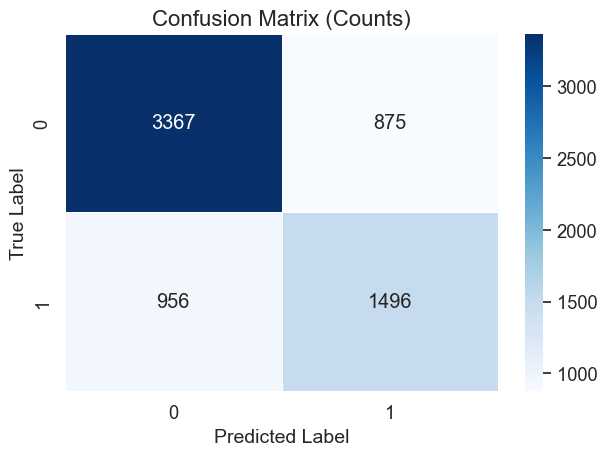

In [ ]:
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5,
    linecolor="white",
    cbar=True
)

plt.title("Confusion Matrix (Counts)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()